In [1]:
import statsmodels.api as sm
import sys
sys.path.append('../src')

from yf_dataset import *
from ta_features import *
import seaborn as sns

In [2]:
ticker = 'amd'
label = 'AMD'
start_date = '2010-01-01'
close_price_period = '1d'
target_pct_change_period = 10 # n = period

In [3]:
amd_df = get_stock_data(ticker, start_date, period=close_price_period)
format_col_names(amd_df)
amd_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2010-01-04,9.790000,9.900000,9.680000,9.700000,9.700000,18748700
2010-01-05,9.710000,9.900000,9.680000,9.710000,9.710000,22145700
2010-01-06,9.680000,9.760000,9.550000,9.570000,9.570000,18643400
2010-01-07,9.510000,9.550000,9.180000,9.470000,9.470000,26806800
2010-01-08,9.370000,9.470000,9.290000,9.430000,9.430000,13752800
...,...,...,...,...,...,...
2023-11-16,117.199997,120.730003,116.410004,119.830002,119.830002,49661900
2023-11-17,119.639999,121.489998,118.820000,120.620003,120.620003,38508900
2023-11-20,120.699997,121.930000,120.070000,121.529999,121.529999,43138700


In [4]:
add_pct_ch_and_future(amd_df, period = 10)
amd_df

c:\Users\user\Desktop\FMLProject\FML\notebooks\../src\ta_features.py:15: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  df[str(period) + 'd_close_future_pct'] = df[str(period) + 'd_future_close'].pct_change(period) #calc future % change


,Open,High,Low,Close,Adj_Close,Volume,10d_future_close,10d_close_future_pct,10d_close_pct
Date,,,,,,,,,
2010-01-04,9.790000,9.900000,9.680000,9.700000,9.700000,18748700,9.01,NaN,NaN
2010-01-05,9.710000,9.900000,9.680000,9.710000,9.710000,22145700,8.87,NaN,NaN
2010-01-06,9.680000,9.760000,9.550000,9.570000,9.570000,18643400,8.99,NaN,NaN
2010-01-07,9.510000,9.550000,9.180000,9.470000,9.470000,26806800,7.88,NaN,NaN
2010-01-08,9.370000,9.470000,9.290000,9.430000,9.430000,13752800,8.07,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-11-16,117.199997,120.730003,116.410004,119.830002,119.830002,49661900,NaN,0.022365,0.111286
2023-11-17,119.639999,121.489998,118.820000,120.620003,120.620003,38508900,NaN,0.015669,0.074566
2023-11-20,120.699997,121.930000,120.070000,121.529999,121.529999,43138700,NaN,0.008064,0.087517


In [5]:
add_sma(amd_df, [14, 200])
add_rsi(amd_df, [14, 200])
add_ema(amd_df, [14, 200])

Index(['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume',
       '10d_future_close', '10d_close_future_pct', '10d_close_pct', 'sma14',
       'sma200', 'rsi14', 'rsi200', 'ema14', 'ema200'],
      dtype='object')

In [6]:
clipped_df = amd_df[remove_features(amd_df, ['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume',
       '10d_future_close'])]

In [7]:
clipped_df

,10d_close_future_pct,10d_close_pct,sma14,sma200,rsi14,rsi200,ema14,ema200
Date,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-11-16,0.022365,0.111286,112.012142,102.36045,67.642982,52.483479,113.259091,102.047797
2023-11-17,0.015669,0.074566,113.757857,102.52200,68.507988,52.566484,114.240546,102.232595
2023-11-20,0.008064,0.087517,115.402857,102.69920,69.518820,52.662215,115.212473,102.424609


<Axes: >

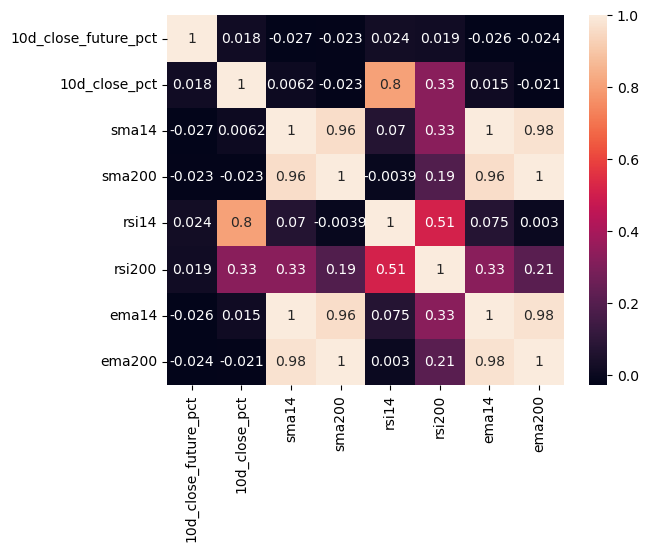

In [8]:
corr = clipped_df.corr()
sns.heatmap(corr, annot=True)

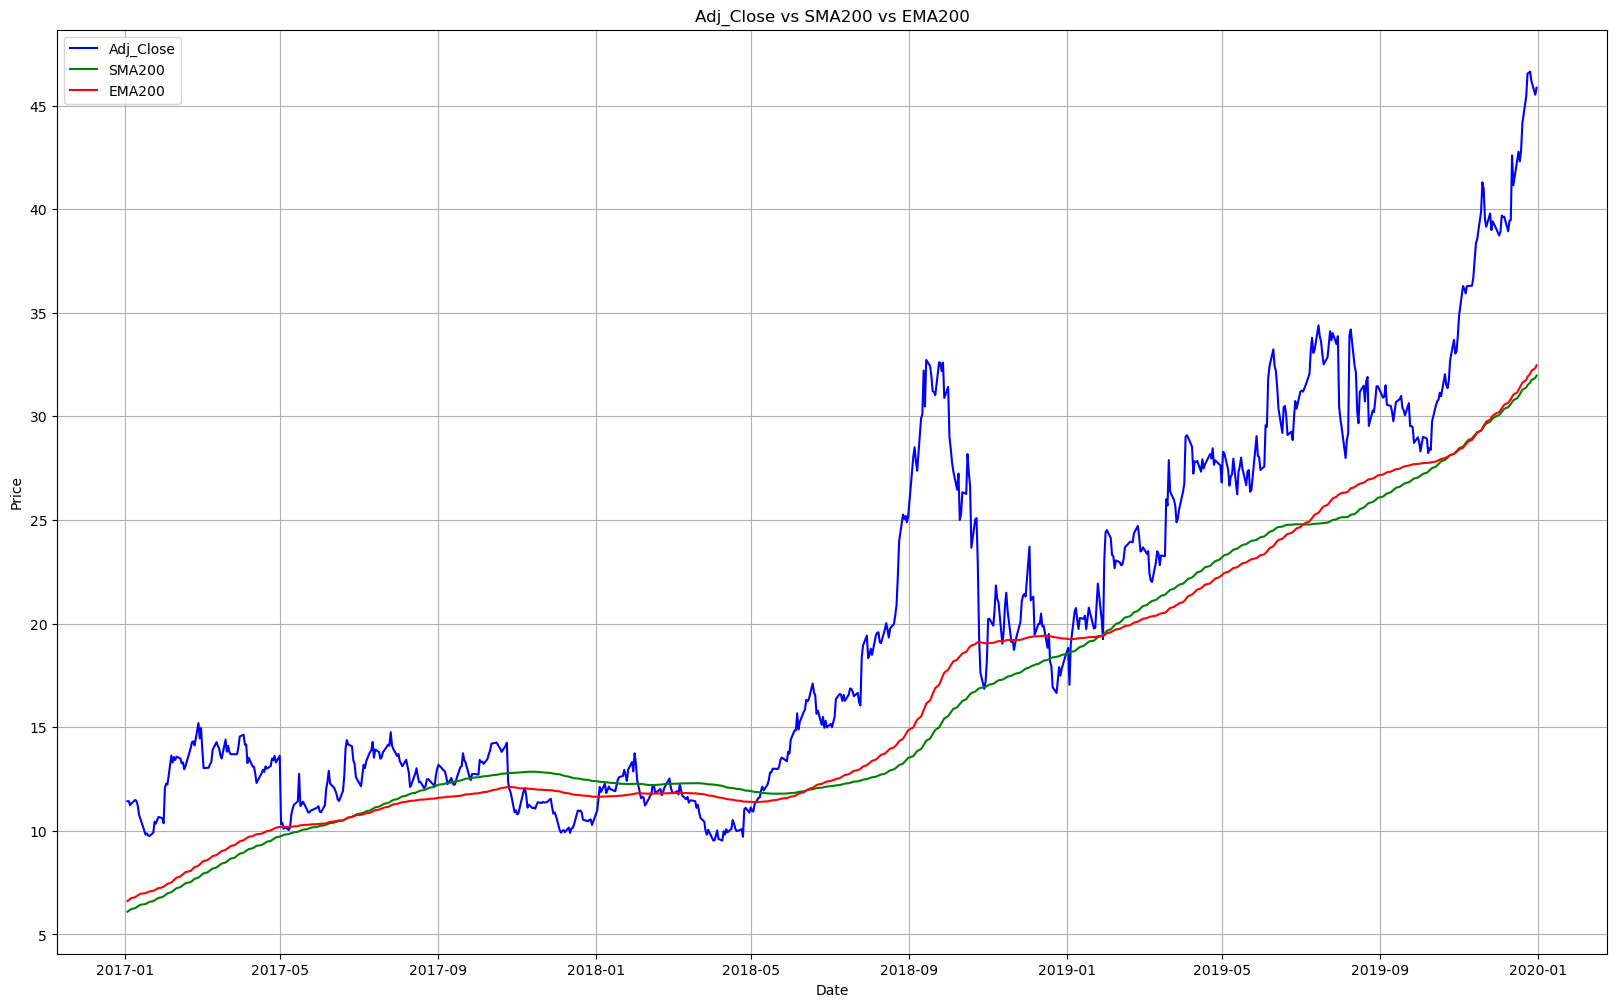

In [17]:
# Plotting
plt.figure(figsize=(20, 12))

# Plot Adj_Close
plt.plot(amd_df['Adj_Close']['2017-01-01':'2019-12-31'], label='Adj_Close', color='blue')

# Plot SMA200
plt.plot(amd_df['sma200']['2017-01-01':'2019-12-31'], label='SMA200', color='green')

# Plot EMA200
plt.plot(amd_df['ema200']['2017-01-01':'2019-12-31'], label='EMA200', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Adj_Close vs SMA200 vs EMA200')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
negative_values_count = (amd_df['10d_close_future_pct'] < 0).sum()
negative_values_count

1571

In [20]:
amd_df[amd_df['10d_close_future_pct'] < 0]

,Open,High,Low,Close,Adj_Close,Volume,10d_future_close,10d_close_future_pct,10d_close_pct,sma14,sma200,rsi14,rsi200,ema14,ema200
Date,,,,,,,,,,,,,,,
2010-01-19,8.840000,9.210000,8.840000,9.010000,9.010000,24866200,7.910000,-0.122087,-0.071134,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-20,8.980000,9.000000,8.760000,8.870000,8.870000,22813600,7.810000,-0.119504,-0.086509,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-21,9.010000,9.100000,8.770000,8.990000,8.990000,37888700,7.190000,-0.200222,-0.060606,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-22,8.550000,8.560000,7.820000,7.880000,7.880000,69136400,7.350000,-0.067259,-0.167899,9.100714,NaN,NaN,NaN,9.100714,NaN
2010-01-25,8.010000,8.140000,7.930000,8.070000,8.070000,20560000,7.420000,-0.080545,-0.144221,8.984286,NaN,27.622781,NaN,8.963286,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-11,109.139999,110.099998,106.930000,108.309998,108.309998,51085600,96.059998,-0.113101,0.104415,102.503571,97.47065,57.936483,51.358706,104.486105,100.385330
2023-10-12,108.400002,111.309998,107.510002,108.790001,108.790001,60959400,93.669998,-0.138983,0.058680,103.402857,97.69200,58.721101,51.410237,105.059958,100.468958
2023-10-13,108.650002,108.970001,104.750000,105.089996,105.089996,52881500,96.430000,-0.082406,0.022077,103.953571,97.90110,50.847629,50.991735,105.063963,100.514939
